In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
### read dataset
df=pd.read_csv('/config/workspace/Dataset/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
## from the above we can see theat there are some misconceptions like glucose,b.P cant be zero insulin and BMI can't be zero so here we will substituite it with the mean values 
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

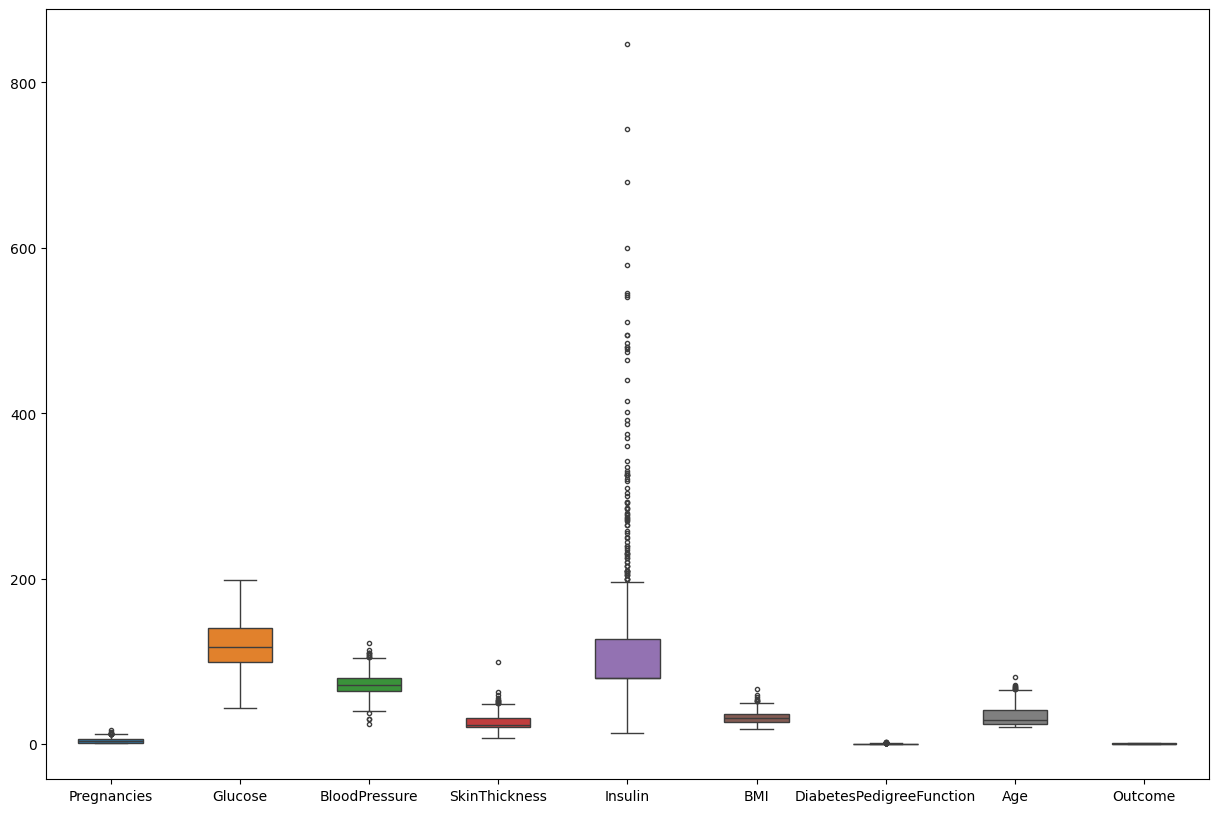

In [9]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

In [10]:
## independent and dependent variables
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
X.shape

(768, 8)

In [12]:
## train- test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
## as for insuline data we saw that there are outliers we need to do standardscaling
from sklearn.preprocessing import StandardScaler
import pickle
def scaler_standerd(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    ## saving the model
    import pickle
    file=open('/config/workspace/Model/standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled,X_test_scaled



In [14]:
X_train_scaled,X_test_scaled=scaler_standerd(X_train,X_test)

In [15]:
## train logistic regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [16]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [17]:
## hyperparameter tuning
#Gridsearch
from sklearn.model_selection import GridSearchCV
parameters={
    'penalty':['l1','l2'],
    'C':[1],
    'solver':['lbfgs', 'liblinear', 'newton-cg']
}

In [18]:
clf=GridSearchCV(log_reg,param_grid=parameters,scoring='accuracy',cv=10)

In [19]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [20]:
clf.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [21]:
clf.best_score_

0.765388683236383

In [22]:
X_train_scaled

array([[-0.7903823 , -1.25806262, -0.24875152, ..., -0.05130551,
        -0.49073479, -1.03594038],
       [ 1.6020846 , -0.32713796,  0.81650936, ..., -0.5985773 ,
         2.41502991,  1.48710085],
       [-1.13216328,  0.57053938, -2.15757252, ..., -0.52642693,
         0.54916055, -0.94893896],
       ...,
       [ 1.94386558, -0.69285836,  1.1469629 , ...,  1.91225539,
         1.981245  ,  0.44308379],
       [-0.15977858,  0.637034  , -0.24875152, ...,  1.45049306,
        -0.78487662, -0.33992901],
       [-0.15977858,  0.10507706,  1.97309676, ..., -1.42109145,
        -0.61552223, -1.03594038]])

In [70]:
X_test_scaled

array([[ 0.57674164, -0.79260029, -1.16621189, ...,  0.23836693,
        -0.11637247,  0.87809089],
       [-0.7903823 , -0.32713796,  0.23821566, ...,  0.48367817,
        -0.954231  , -1.03594038],
       [-0.7903823 , -0.4601272 , -0.67053158, ..., -0.2233954 ,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.26030361, -0.89234222, -0.00962449, ...,  0.64240897,
         0.04703966,  2.0961108 ],
       [-0.7903823 ,  0.80327055, -0.17485126, ..., -0.62743744,
        -0.39268751, -0.33992901],
       [ 1.26030361, -1.59053571, -0.17485126, ...,  0.42595788,
         0.70068816,  0.53008521]])

In [23]:
y_pred=clf.predict(X_test_scaled)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[83, 16],
       [20, 35]])

In [25]:
accuracy_score(y_test,y_pred)

0.7662337662337663

In [87]:
import pickle
file=open('/config/workspace/Model/modelforPredction.pkl','wb')
pickle.dump(log_reg,file)
file.close()